# Business task

Build an effective machine learning model to predict whether the avocado is conventional or organic.

# Import necessary packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime as dt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import plot_confusion_matrix,plot_roc_curve,classification_report,accuracy_score,precision_score,recall_score,f1_score

# Loading the dataset

In [2]:
df = pd.read_csv('Downloads\\avocados.csv')

# Overview and statistical summary

In [3]:
df.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
df.tail()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
18244,7,2018-02-04,1.63,17074.83,2046.96,1529.20,0.00,13498.67,13066.82,431.85,0.0,organic,2018,WestTexNewMexico
18245,8,2018-01-28,1.71,13888.04,1191.70,3431.50,0.00,9264.84,8940.04,324.80,0.0,organic,2018,WestTexNewMexico
18246,9,2018-01-21,1.87,13766.76,1191.92,2452.79,727.94,9394.11,9351.80,42.31,0.0,organic,2018,WestTexNewMexico
18247,10,2018-01-14,1.93,16205.22,1527.63,2981.04,727.01,10969.54,10919.54,50.00,0.0,organic,2018,WestTexNewMexico
18248,11,2018-01-07,1.62,17489.58,2894.77,2356.13,224.53,12014.15,11988.14,26.01,0.0,organic,2018,WestTexNewMexico


In [5]:
df.shape

(18249, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18249 entries, 0 to 18248
Data columns (total 14 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    18249 non-null  int64  
 1   Date          18249 non-null  object 
 2   AveragePrice  18249 non-null  float64
 3   Total Volume  18249 non-null  float64
 4   4046          18249 non-null  float64
 5   4225          18249 non-null  float64
 6   4770          18249 non-null  float64
 7   Total Bags    18249 non-null  float64
 8   Small Bags    18249 non-null  float64
 9   Large Bags    18249 non-null  float64
 10  XLarge Bags   18249 non-null  float64
 11  type          18249 non-null  object 
 12  year          18249 non-null  int64  
 13  region        18249 non-null  object 
dtypes: float64(9), int64(2), object(3)
memory usage: 1.9+ MB


In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
Unnamed: 0,18249.0,NaN,NaN,NaN,24.232232,15.481045,0.0,10.0,24.0,38.0,52.0
Date,18249,169,2017-12-31,108,NaN,NaN,NaN,NaN,NaN,NaN,NaN
AveragePrice,18249.0,NaN,NaN,NaN,1.405978,0.402677,0.44,1.1,1.37,1.66,3.25
Total Volume,18249.0,NaN,NaN,NaN,850644.013009,3453545.355399,84.56,10838.58,107376.76,432962.29,62505646.52
4046,18249.0,NaN,NaN,NaN,293008.424531,1264989.081763,0.0,854.07,8645.3,111020.2,22743616.17
4225,18249.0,NaN,NaN,NaN,295154.568356,1204120.401135,0.0,3008.78,29061.02,150206.86,20470572.61
4770,18249.0,NaN,NaN,NaN,22839.735993,107464.068435,0.0,0.0,184.99,6243.42,2546439.11
Total Bags,18249.0,NaN,NaN,NaN,239639.20206,986242.399216,0.0,5088.64,39743.83,110783.37,19373134.37
Small Bags,18249.0,NaN,NaN,NaN,182194.686696,746178.514962,0.0,2849.42,26362.82,83337.67,13384586.8
Large Bags,18249.0,NaN,NaN,NaN,54338.088145,243965.964547,0.0,127.47,2647.71,22029.25,5719096.61


# Data cleaning

In [8]:
#checking unique values in region column
df['region'].unique()

array(['Albany', 'Atlanta', 'BaltimoreWashington', 'Boise', 'Boston',
       'BuffaloRochester', 'California', 'Charlotte', 'Chicago',
       'CincinnatiDayton', 'Columbus', 'DallasFtWorth', 'Denver',
       'Detroit', 'GrandRapids', 'GreatLakes', 'HarrisburgScranton',
       'HartfordSpringfield', 'Houston', 'Indianapolis', 'Jacksonville',
       'LasVegas', 'LosAngeles', 'Louisville', 'MiamiFtLauderdale',
       'Midsouth', 'Nashville', 'NewOrleansMobile', 'NewYork',
       'Northeast', 'NorthernNewEngland', 'Orlando', 'Philadelphia',
       'PhoenixTucson', 'Pittsburgh', 'Plains', 'Portland',
       'RaleighGreensboro', 'RichmondNorfolk', 'Roanoke', 'Sacramento',
       'SanDiego', 'SanFrancisco', 'Seattle', 'SouthCarolina',
       'SouthCentral', 'Southeast', 'Spokane', 'StLouis', 'Syracuse',
       'Tampa', 'TotalUS', 'West', 'WestTexNewMexico'], dtype=object)

In [9]:
#removing observations related to 'TotalUS'
df = df[df['region']!='TotalUS']

In [10]:
#removing irrelevant columns
df.drop('Unnamed: 0',axis=1,inplace=True)

In [11]:
df.head()

,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [12]:
df.shape

(17911, 13)

In [13]:
#converting Date column to type Datetime
df['Date']=pd.to_datetime(df['Date'])

In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17911 entries, 0 to 18248
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          17911 non-null  datetime64[ns]
 1   AveragePrice  17911 non-null  float64       
 2   Total Volume  17911 non-null  float64       
 3   4046          17911 non-null  float64       
 4   4225          17911 non-null  float64       
 5   4770          17911 non-null  float64       
 6   Total Bags    17911 non-null  float64       
 7   Small Bags    17911 non-null  float64       
 8   Large Bags    17911 non-null  float64       
 9   XLarge Bags   17911 non-null  float64       
 10  type          17911 non-null  object        
 11  year          17911 non-null  int64         
 12  region        17911 non-null  object        
dtypes: datetime64[ns](1), float64(9), int64(1), object(2)
memory usage: 1.9+ MB


# EDA

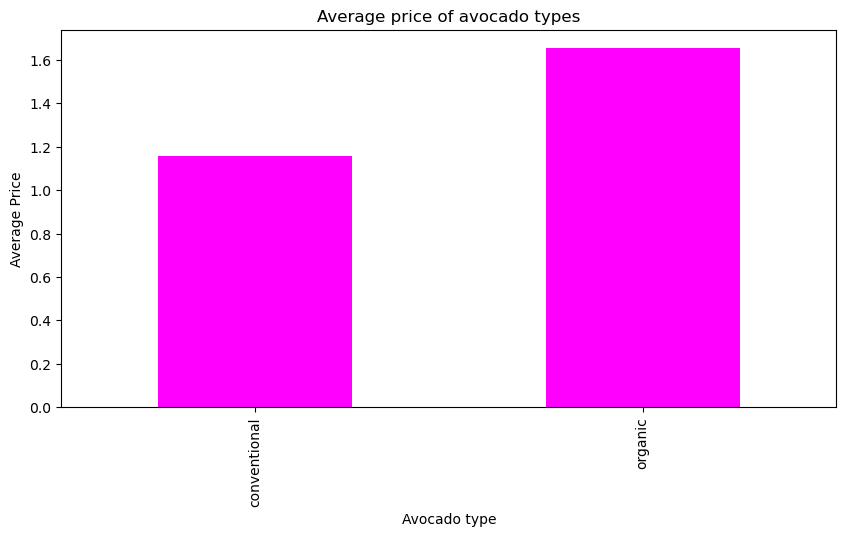

In [15]:
plt.figure(figsize=(10,5),dpi=100)
df.groupby('type').mean()['AveragePrice'].plot(kind='bar',color='magenta')
plt.xlabel('Avocado type')
plt.ylabel('Average Price')
plt.title('Average price of avocado types');

In [16]:
# setting Date as index
df.set_index('Date',inplace=True)

In [17]:
df.head(2)

,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
Date,,,,,,,,,,,,
2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany


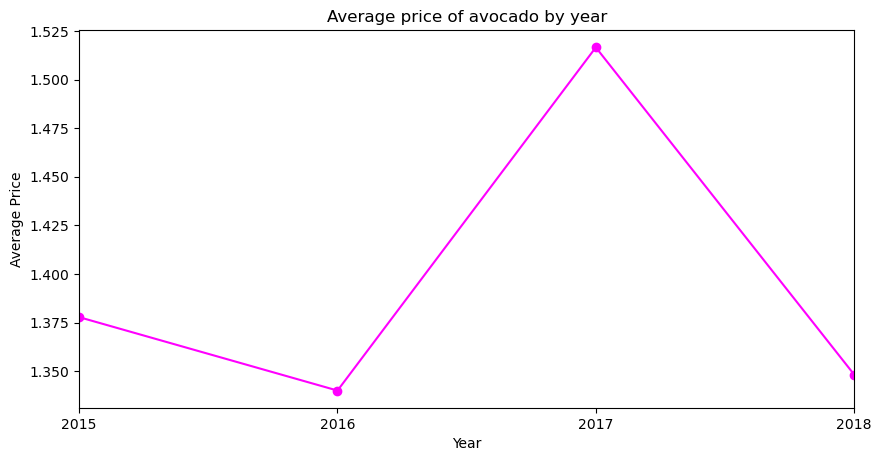

In [18]:
plt.figure(figsize=(10,5),dpi=100)
df.resample('Y').mean()['AveragePrice'].plot(marker='o',color='magenta')
plt.xlabel('Year')
plt.ylabel('Average Price')
plt.title('Average price of avocado by year');

The average price in the year 2016 was lowest, whereas it peaked in the year 2017 with average price well above 1.5 dollars per avocado.

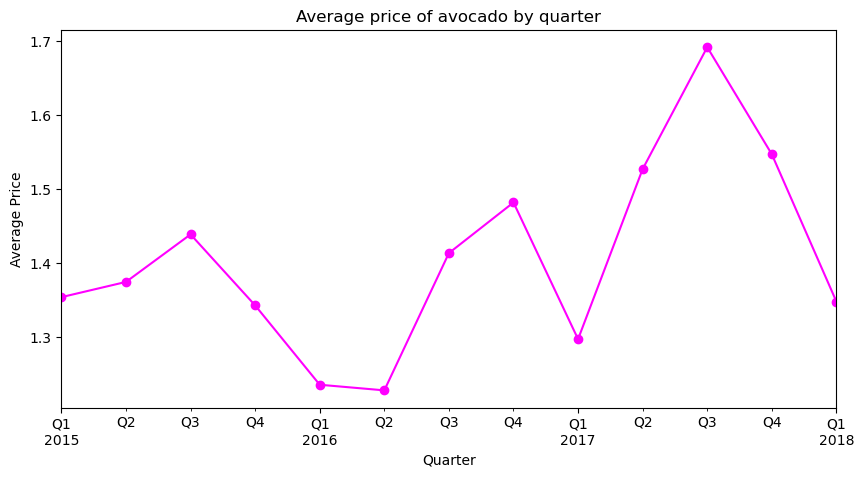

In [19]:
plt.figure(figsize=(10,5),dpi=100)
df.resample('Q').mean()['AveragePrice'].plot(marker='o',color='magenta')
plt.xlabel('Quarter')
plt.ylabel('Average Price')
plt.title('Average price of avocado by quarter');

The average avocado price dipped way below 1.3 dollars in Q1 of 2016 then fell further in Q2, then rose upto 1.5 dollars in Q4 of 2016. Then it slumped to 1.3 dollars in Q1 of 2017 then soared to just below 1.7 dollars in Q3. 

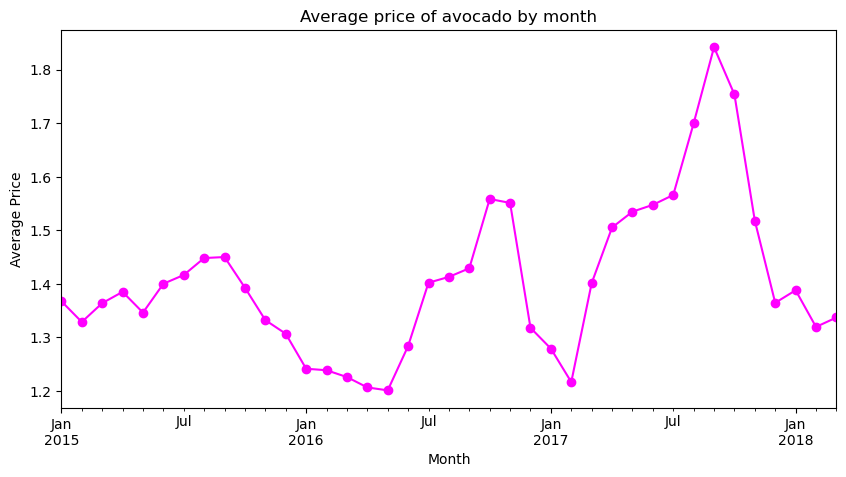

In [20]:
plt.figure(figsize=(10,5),dpi=100)
df.resample('M').mean()['AveragePrice'].plot(marker='o',color='magenta')
plt.xlabel('Month')
plt.ylabel('Average Price')
plt.title('Average price of avocado by month');

The lowest average price was in may 2016 and highest was in october 2017.

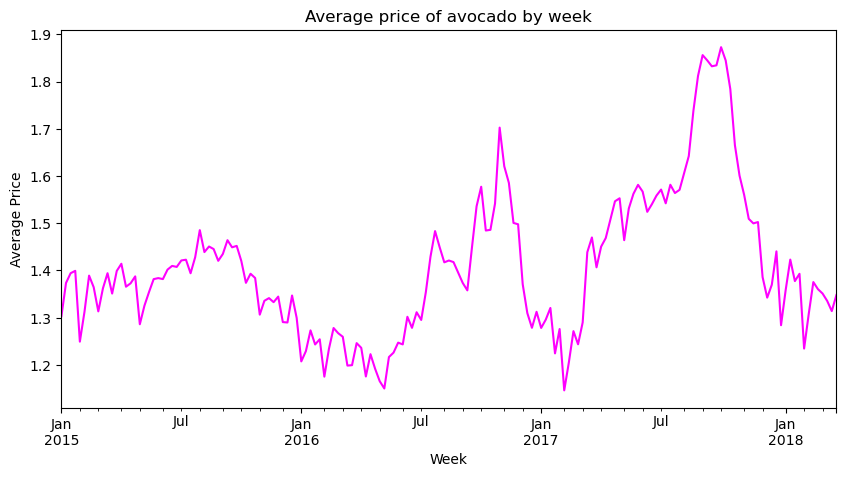

In [21]:
plt.figure(figsize=(10,5),dpi=100)
df.resample('W').mean()['AveragePrice'].plot(color='magenta')
plt.xlabel('Week')
plt.ylabel('Average Price')
plt.title('Average price of avocado by week');

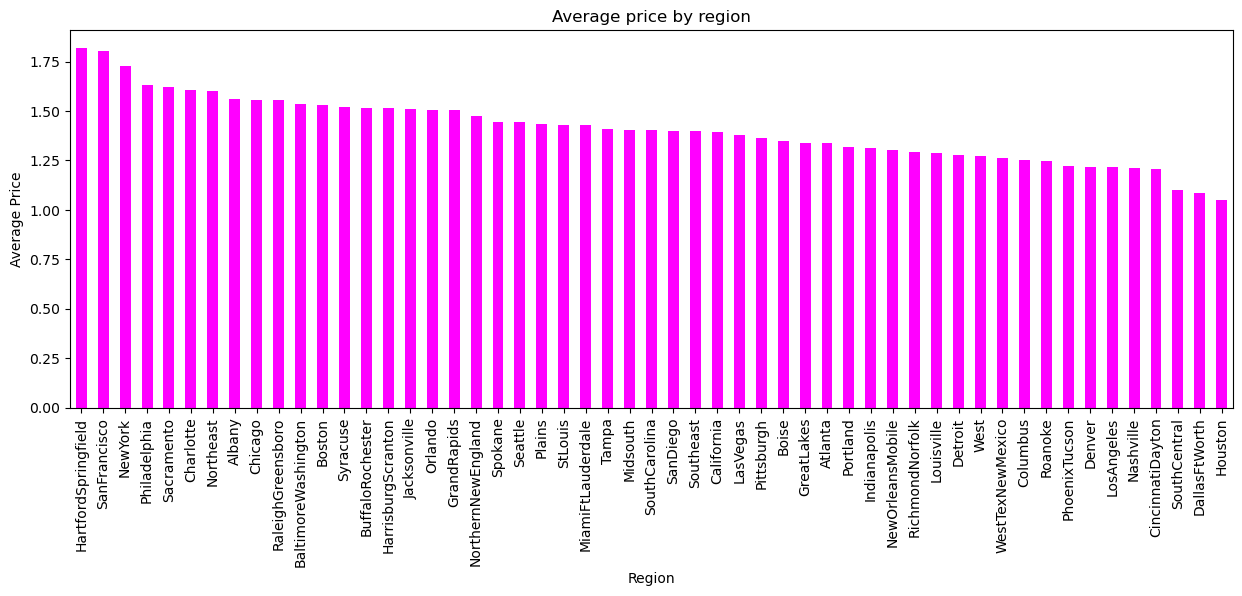

In [28]:
plt.figure(figsize=(15,5),dpi=100)
df.groupby('region').mean()['AveragePrice'].sort_values(ascending=False).plot(kind='bar',color = 'magenta')
plt.xlabel('Region')
plt.ylabel('Average Price')
plt.title('Average price by region');

Highest average price is from Hartfordspringfield and lowest price is from Houston region.

In [24]:
#resetting index
df.reset_index(inplace=True)

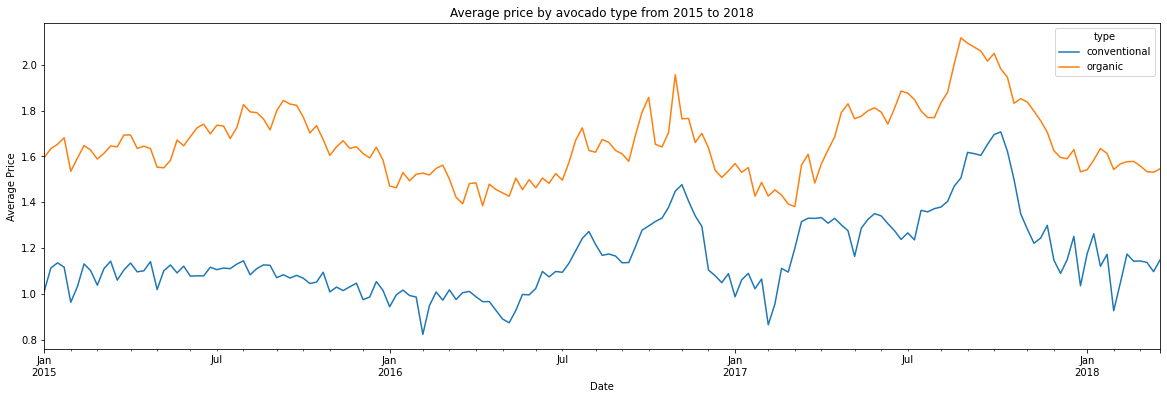

In [32]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby(['Date','type']).mean()['AveragePrice'].unstack().plot(ax = ax)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average price by region')
plt.title('Average price by avocado type from 2015 to 2018');

The average price of organic avocado stayed relatively higher than conventional type from 2015 to 2018.

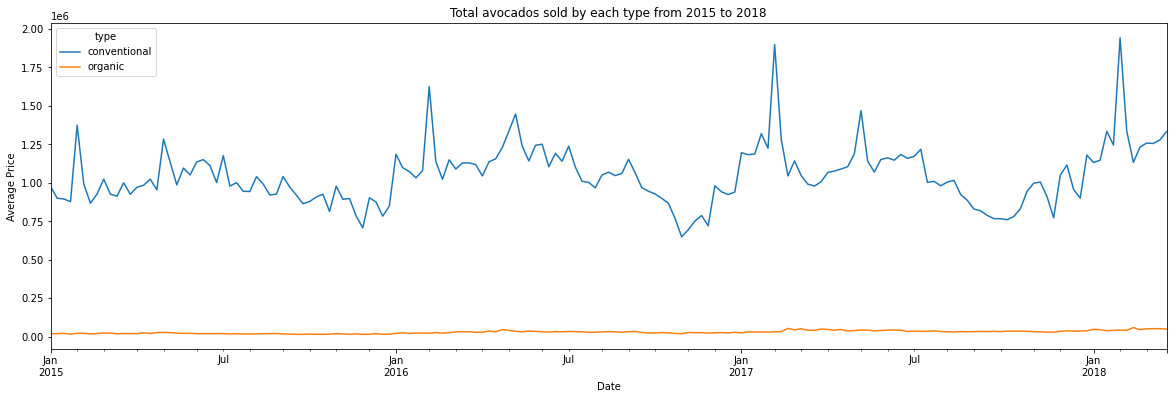

In [34]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby(['Date','type']).mean()['Total Volume'].unstack().plot(ax = ax)
plt.xlabel('Date')
plt.ylabel('Average Price')
plt.title('Average price by region')
plt.title('Total avocados sold by each type from 2015 to 2018');

Organic avocados were sold less in number compared to conventional ones.

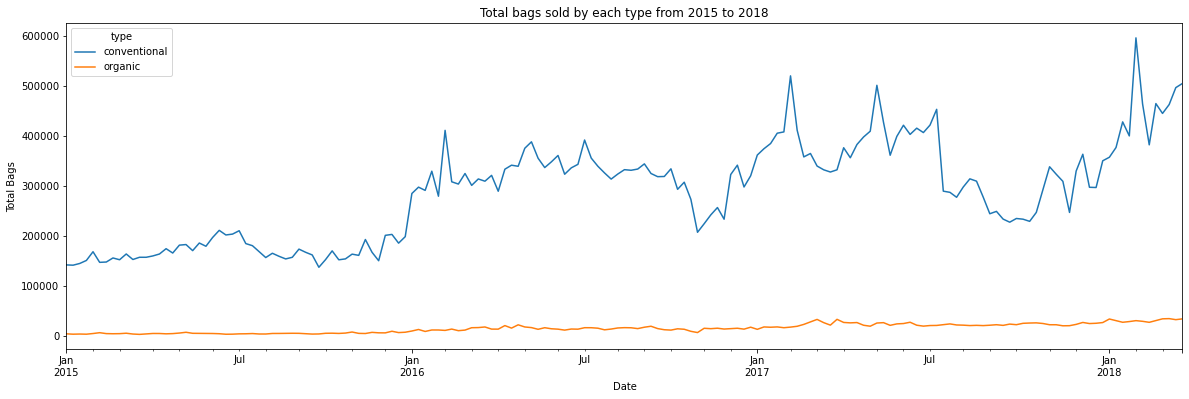

In [35]:
fig, ax = plt.subplots(figsize=(20,6))
df.groupby(['Date','type']).mean()['Total Bags'].unstack().plot(ax = ax)
plt.xlabel('Date')
plt.ylabel('Total Bags')
plt.title('Average price by region')
plt.title('Total bags sold by each type from 2015 to 2018');

Organic avocados were sold less in number compared to conventional ones.

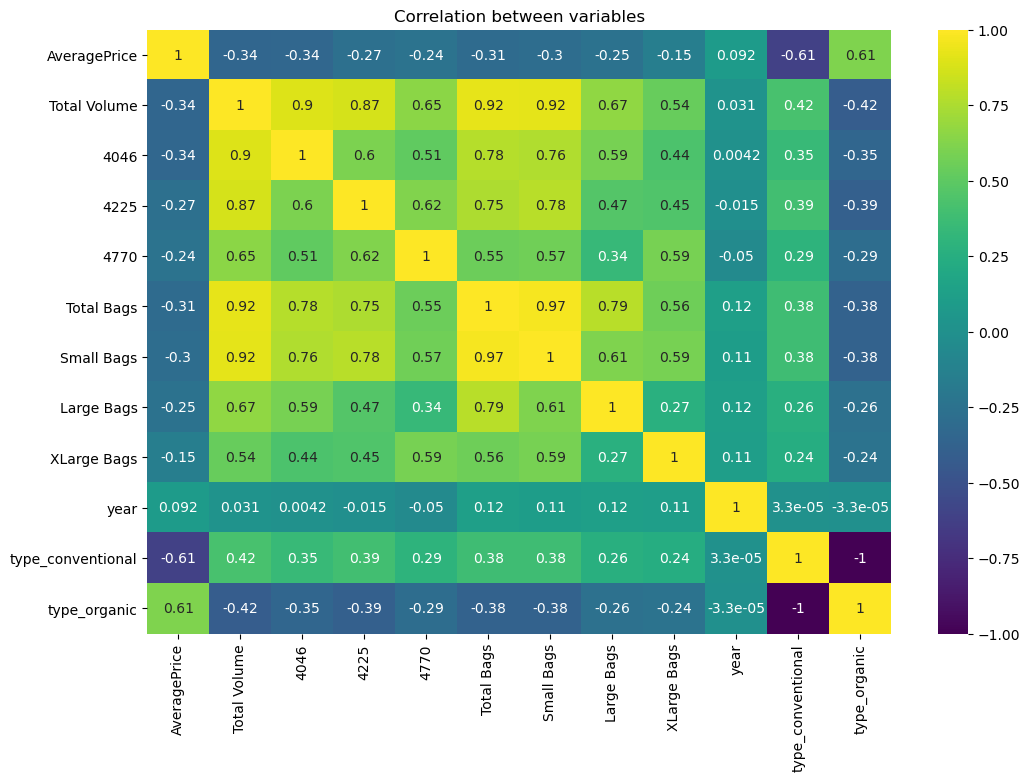

In [36]:
# checking correlation between variables
plt.figure(figsize=(12,8),dpi=100)
sns.heatmap(pd.get_dummies(df.drop('region',axis=1)).corr(),cmap='viridis',annot=True)
plt.title('Correlation between variables');

# Creating X,y and doing train - test split

In [37]:
X = pd.get_dummies(df.drop(['Date','year','type'],axis=1),drop_first=True)
y = df['type']

In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30,stratify=y, random_state=42)

In [39]:
scale = StandardScaler()

In [40]:
X_train_scaled = scale.fit_transform(X_train)
X_test_scaled = scale.transform(X_test)

# Model building

# Logistic Regression

In [41]:
log_model = LogisticRegression()

In [42]:
log_model.fit(X_train_scaled,y_train)

C:\Users\nhars\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

# Evaluating Model

In [43]:
log_model.score(X_test_scaled,y_test)

0.9972087830294009

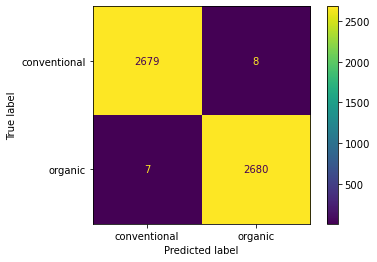

In [44]:
plot_confusion_matrix(log_model,X_test_scaled,y_test)

Only 15 incorrectly predicted values

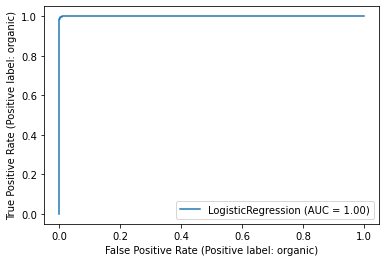

In [45]:
plot_roc_curve(log_model,X_test_scaled,y_test)

In [46]:
y_pred = log_model.predict(X_test_scaled)

In [47]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

conventional       1.00      1.00      1.00      2687
     organic       1.00      1.00      1.00      2687

    accuracy                           1.00      5374
   macro avg       1.00      1.00      1.00      5374
weighted avg       1.00      1.00      1.00      5374



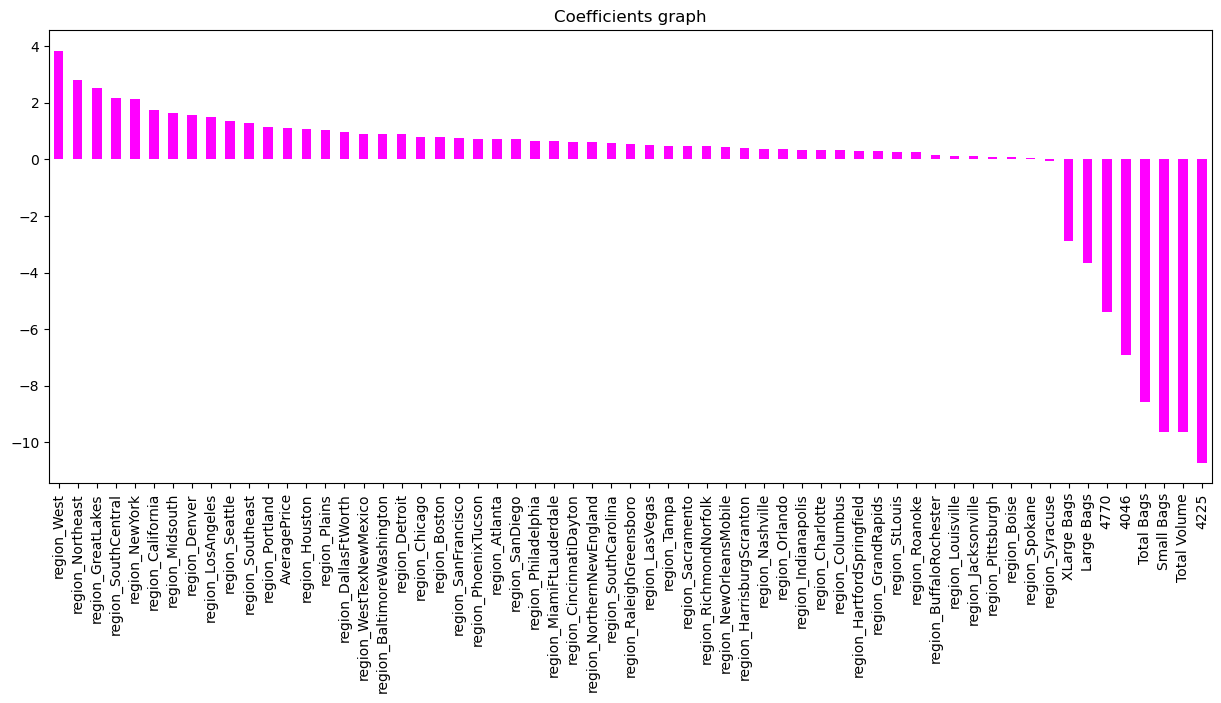

In [52]:
#plotting coefficients
plt.figure(figsize=(15,6),dpi=100)
pd.Series(index=X.columns,data = log_model.coef_[0]).sort_values(ascending=False).plot(kind='bar',color='magenta')
plt.title('Coefficients graph');

# Summary

Logisitic Regression model has a score of .99, which is a pretty good score to predict whether an avocado is organic or conventional.

**Thank you!**